QUESTION 2: Checking Temporal Trends in Game Releases: How has the number of game releases on STEAM evolved over the years? Can you identify any seasonal patterns or trends in release dates? 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/divjot21/final_0_80509.csv")
data

/var/folders/c8/ff8ywsc54fb_wcq687c2hbk40000gn/T/ipykernel_5557/654260392.py:1: DtypeWarning: Columns (10,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/divjot21/final_0_80509.csv")


,Index,AppID,Title,Initial_Price,Final_Price,Discount_Percent,Developers,Publishers,Genres,Categories,...,Subtitle_Languages,Positive_Reviews,Negative_Reviews,Total_Reviews,Overall_Review_Summary,Recent_Reviews,Recent_Review_Summary,Mature_Content_Desc,Awards,Curators
0,0,20200,Galactic Bowling,NaN,NaN,NaN,['Perpetual FX Creative'],['Perpetual FX Creative'],"['Casual', 'Indie', 'Sports']","['Single-player', 'Multi-player', 'Steam Achie...",...,['English'],6,11,12,Mostly Negative,NaN,NaN,NaN,NaN,6.0
1,1,655370,Train Bandit,52.0,52.0,0.0,['Rusty Moyher'],['Wild Rooster'],"['Action', 'Indie']","['Single-player', 'Steam Achievements', 'Full ...",...,"['English', 'French', 'Italian', 'German', 'Sp...",57,7,53,Very Positive,NaN,NaN,NaN,NaN,8.0
2,2,1732930,Jolt Project,199.0,199.0,0.0,['Campião Games'],['Campião Games'],"['Action', 'Adventure', 'Indie', 'Strategy']",['Single-player'],...,['English'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3,1355720,Henosis™,NaN,NaN,NaN,['Odd Critter Games'],['Odd Critter Games'],"['Adventure', 'Casual', 'Indie']","['Single-player', 'Full controller support']",...,['English'],5,0,5,5 user reviews,NaN,NaN,NaN,NaN,5.0
4,4,1139950,Two Weeks in Painland,0.0,0.0,0.0,['Unusual Games'],['Unusual Games'],"['Adventure', 'Indie']","['Single-player', 'Steam Achievements']",...,"['English', 'Spanish - Spain']",53,6,59,Very Positive,NaN,NaN,This Game may contain content not appropriate ...,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80505,80505,574674,VRC PRO Deluxe Off-road tracks 4,570.0,285.0,50.0,['Virtual Racing Industries Ltd.'],['Virtual Racing Industries Ltd.'],"['Action', 'Casual', 'Indie', 'Racing', 'Simul...","['Single-player', 'Multi-player', 'Downloadabl...",...,['English'],0,1,1,1 user reviews,NaN,NaN,NaN,NaN,NaN
80506,80506,947930,Car Mechanic Simulator 2018 - Porsche DLC,300.0,36.0,88.0,['Red Dot Games'],['PlayWay S.A.'],"['Racing', 'Simulation']","['Single-player', 'Downloadable Content', 'Ste...",...,"['English', 'French', 'Italian', 'German', 'Sp...",67,7,70,Very Positive,NaN,NaN,NaN,NaN,1.0
80507,80507,1900780,Erannorth Chronicles - Ancient Ruins,450.0,360.0,20.0,['Spyridon Thalassinos'],['Spyridon Thalassinos'],"['Adventure', 'Indie', 'RPG', 'Strategy']","['Single-player', 'Downloadable Content', 'Ste...",...,['English'],10,0,10,Positive,NaN,NaN,NaN,NaN,NaN
80508,80508,2470521,Crossout — Electric beetle (Lite edition),1199.0,1199.0,0.0,['Targem Games'],['Gaijin Distribution KFT'],"['Action', 'Free to Play', 'Massively Multipla...","['Multi-player', 'MMO', 'PvP', 'Online PvP', '...",...,['English'],3,19,21,Negative,NaN,NaN,NaN,NaN,NaN


In [3]:
release_dates = data['Release_Date']
release_dates

0        21 Oct, 2008
1        12 Oct, 2017
2        17 Nov, 2021
3        23 Jul, 2020
4         3 Feb, 2020
             ...     
80505    30 Aug, 2019
80506     8 Oct, 2018
80507    14 Mar, 2022
80508    23 Aug, 2023
80509    23 Aug, 2023
Name: Release_Date, Length: 80510, dtype: object

In [4]:
yearly_count ={}
for i in range(0,80510):
    a = release_dates[i]
    if isinstance(a,str):
        b = a[-4::]
        if b in yearly_count:
            yearly_count[b] += 1
        else:
            yearly_count[b] = 1
        
print(yearly_count)

{'2008': 156, '2017': 6178, '2021': 12105, '2020': 9576, '2022': 13963, '2014': 1612, '2019': 7716, '2016': 4348, '2018': 7912, '2023': 10419, '2010': 298, '2015': 2638, '2013': 505, '2007': 99, '2012': 349, '2006': 66, '2009': 321, '2011': 293, '2003': 3, '2005': 6, '2004': 6, '2002': 1, '1999': 3, '1997': 2, '2001': 4, '2000': 2, '1998': 1, 'soon': 6, '2024': 10}


In [5]:
sum = 0
years_list = list(yearly_count.keys())
for i in years_list:
    sum += yearly_count[i]
print(sum)

type(years_list)

78598


list

In [6]:
print(years_list)

['2008', '2017', '2021', '2020', '2022', '2014', '2019', '2016', '2018', '2023', '2010', '2015', '2013', '2007', '2012', '2006', '2009', '2011', '2003', '2005', '2004', '2002', '1999', '1997', '2001', '2000', '1998', 'soon', '2024']


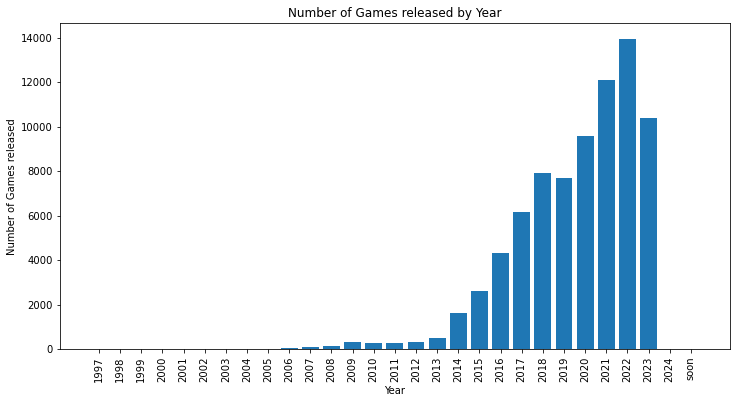

In [7]:
sorted_data = {k: v for k, v in sorted(yearly_count.items(), key=lambda item: int(item[0]) if item[0].isdigit() else float('inf'))}

years = list(sorted_data.keys())
values = list(sorted_data.values())

plt.figure(figsize=(12, 6))
plt.bar(years, values)
plt.xlabel('Year')
plt.ylabel('Number of Games released')
plt.title('Number of Games released by Year')
plt.xticks(rotation=90)  

plt.show()


The plot shows the number of games released per year, and some interesting insights can be inferred from it:

Recent Increase in Game Releases: In recent years (2020-2023), there has been a significant increase in the number of game releases. This indicates a growing and dynamic gaming industry, with more games being developed and launched.

Steady Growth in the 2010s: The number of game releases seems to have shown steady growth throughout the 2010s. This period has seen a consistent increase in the number of games, with some fluctuations.

A Few Standout Years: The years 2021, 2017, and 2018 had notably higher numbers of game releases compared to other years. This suggests that certain years may have been particularly active or successful in the gaming industry.

Early 2000s and Late 2000s: The early 2000s and late 2000s (e.g., 2003, 2007) had a relatively lower number of game releases. This may indicate a relatively quieter period in the gaming industry during those years.

Overall, this plot provides an overview of the gaming industry's historical pattern of game releases, highlighting periods of growth and potential anomalies in the data.